The plotting utilities and various visualization tools for this notebook depend on [degas](https://github.com/williamgilpin/degas) and [tsfresh](https://tsfresh.readthedocs.io/en/latest/)

In [20]:
import sys

import matplotlib.pyplot as plt
import json

import pandas as pd
import dysts
from dysts.datasets import *
from dysts.utils import *



try:
    from degas import *
except:
    pass

import degas as dg
FIGURE_PATH = "./private_writing/fig_resources/"

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
# data

In [38]:
np.argmax(all_lyapunov)

28

Total models being analyzed is 131.


(array([ 8., 10., 24., 14., 17., 25., 12.,  5.,  4.,  5.]),
 array([0.38139917, 0.47375797, 0.56611678, 0.65847559, 0.7508344 ,
        0.8431932 , 0.93555201, 1.02791082, 1.12026963, 1.21262844,
        1.30498724]),
 <BarContainer object of 10 artists>)

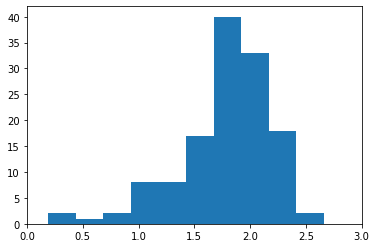

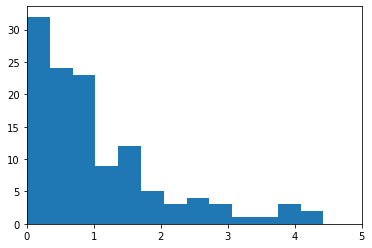

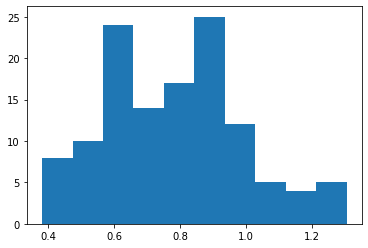

In [31]:
data_path = dysts.data_path

with open(data_path, "r") as file:
    data = json.load(file)
print(f"Total models being analyzed is {len(data.keys())}.")


all_lyapunov = list()
all_correlation_dimensions = list()
all_kaplan_yorke_dimensions = list()
all_dynamical_dimensions = list()
all_pesin_entropies = list()
all_multiscale_entropies = list()

for item in data:
    all_lyapunov.append(data[item]["maximum_lyapunov_estimated"] * data[item]["period"])
    all_correlation_dimensions.append(data[item]["correlation_dimension"])
    all_kaplan_yorke_dimensions.append(data[item]["kaplan_yorke_dimension"])
    all_dynamical_dimensions.append(len(data[item]["initial_conditions"]))
    all_pesin_entropies.append(data[item]["pesin_entropy"])
    try:
        all_multiscale_entropies.append(data[item]["multiscale_entropy"])
    except:
        pass

plt.figure()
plt.hist(all_correlation_dimensions)
plt.xlim([0, 3])

plt.figure()
# histvals, bins = np.histogram(all_lyapunov)
# plt.semilogy(3 + bins[:-1], histvals, '.k')
plt.hist(all_lyapunov, 100)
plt.xlim([0, 5])


# plt.figure()
# plt.hist(all_kaplan_yorke_dimensions)
# # plt.semilogy(3 + bins[:-1], histvals, '.k')

# plt.figure()
# plt.loglog(all_kaplan_yorke_dimensions, all_correlation_dimensions, ".")

# plt.figure()
# plt.hist(all_pesin_entropies)

plt.figure()
plt.hist(all_multiscale_entropies)

In [11]:
# featurize a single file

dataset = TimeSeriesDataset("dysts/data/train_univariate__pts_per_period_100__periods_10.json")
# feature_df = featurize_timeseries(dataset)


In [5]:
# chunk and featurize several time windows


all_feature_dfs = list()
for i in np.linspace(0, 8000, 40).astype(int):
    dataset = TimeSeriesDataset("dysts/data/large_univariate__pts_per_period_100__periods_100.json")
    dataset.trim_series(i, i + 2000)
    feature_df = featurize_timeseries(dataset)
    all_feature_dfs.append(feature_df)
    print(i)
    
## Prune features not detected across all replicates
all_feature_lists = [set(item.columns.to_list()) for item in all_feature_dfs]
common_features = np.array(list(all_feature_lists[0].intersection(*all_feature_lists[1:])))
print(f"{len(common_features)} common features found.")
for i in range(len(all_feature_dfs)):
    all_feature_dfs[i] = all_feature_dfs[i][common_features]

rep_stds = np.std(np.dstack([np.array(df) for df in all_feature_dfs]), axis=-1)
topk_feature_inds = np.squeeze(np.array([np.argsort(np.median(rep_stds, axis=0))]))[:100]
feat_arr_all = np.dstack([np.array(df)[:, topk_feature_inds] for df in all_feature_dfs])
feat_arr_all = np.transpose(feat_arr_all, (2, 0, 1))
# feat_arr_all.dump("benchmarks/resources/feat_arr_all.pkl")




Feature Extraction: 100%|██████████| 33/33 [01:14<00:00,  2.25s/it]


0


Feature Extraction: 100%|██████████| 33/33 [01:15<00:00,  2.28s/it]


205


Feature Extraction: 100%|██████████| 33/33 [01:13<00:00,  2.23s/it]


410


Feature Extraction: 100%|██████████| 33/33 [01:29<00:00,  2.72s/it]


615


Feature Extraction: 100%|██████████| 33/33 [01:17<00:00,  2.34s/it]


820


Feature Extraction: 100%|██████████| 33/33 [01:15<00:00,  2.29s/it]


1025


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.38s/it]


1230


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.38s/it]


1435


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.40s/it]


1641


Feature Extraction: 100%|██████████| 33/33 [01:15<00:00,  2.29s/it]


1846


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.37s/it]


2051


Feature Extraction: 100%|██████████| 33/33 [01:17<00:00,  2.35s/it]


2256


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.45s/it]


2461


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


2666


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.40s/it]


2871


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.43s/it]


3076


Feature Extraction: 100%|██████████| 33/33 [01:23<00:00,  2.54s/it]


3282


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.40s/it]


3487


Feature Extraction: 100%|██████████| 33/33 [01:21<00:00,  2.47s/it]


3692


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


3897


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.40s/it]


4102


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.43s/it]


4307


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


4512


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


4717


Feature Extraction: 100%|██████████| 33/33 [01:19<00:00,  2.42s/it]


4923


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.43s/it]


5128


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.44s/it]


5333


Feature Extraction: 100%|██████████| 33/33 [01:22<00:00,  2.51s/it]


5538


Feature Extraction: 100%|██████████| 33/33 [01:21<00:00,  2.46s/it]


5743


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.39s/it]


5948


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.37s/it]


6153


Feature Extraction: 100%|██████████| 33/33 [01:18<00:00,  2.37s/it]


6358


Feature Extraction: 100%|██████████| 33/33 [01:17<00:00,  2.36s/it]


6564


Feature Extraction: 100%|██████████| 33/33 [01:20<00:00,  2.43s/it]


6769


Feature Extraction: 100%|██████████| 33/33 [01:16<00:00,  2.31s/it]


6974


Feature Extraction: 100%|██████████| 33/33 [01:21<00:00,  2.46s/it]


7179


Feature Extraction: 100%|██████████| 33/33 [01:12<00:00,  2.18s/it]


7384


Feature Extraction: 100%|██████████| 33/33 [01:13<00:00,  2.24s/it]


7589


Feature Extraction: 100%|██████████| 33/33 [01:12<00:00,  2.19s/it]


7794


Feature Extraction: 100%|██████████| 33/33 [01:15<00:00,  2.29s/it]


8000
735 common features found.


In [6]:
feat_arr_all = np.load("benchmarks/resources/feat_arr_all.pkl", allow_pickle=True) # Reload without having to re-run featurization
features_mean = np.median(feat_arr_all, axis=0)
feat_arr_all_flat = np.reshape(feat_arr_all, (-1, feat_arr_all.shape[-1]))
feat_arr = features_mean

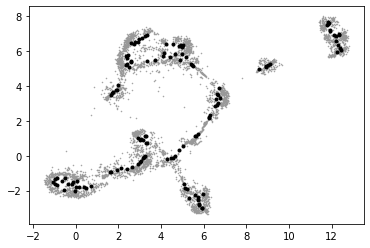

In [8]:
import umap
# model =  PCA(n_components=2, random_state=0)
# model = umap.UMAP(random_state=0, densmap=True)

# from umap.parametric_umap import ParametricUMAP
# model = ParametricUMAP(densmap=False)
model = umap.UMAP(random_state=15, n_neighbors=5)

embedding_mean = model.fit_transform(features_mean)
embedding_all = model.transform(feat_arr_all_flat)


plt.plot(embedding_all[:, 0], embedding_all[:, 1], '.', color=[0.6, 0.6, 0.6], markersize=1)
plt.plot(embedding_mean[:, 0], embedding_mean[:, 1], '.k')

In [383]:
all_attributes = list()
for item in dataset.names:
    model_dyn = getattr(dysts.flows, item)()
    all_attributes.append(model_dyn.maximum_lyapunov_estimated)
all_attributes = np.array(all_attributes)

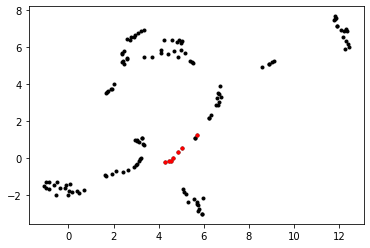

In [73]:

plt.plot(
    embedding_mean[:, 0], 
    embedding_mean[:, 1],
    ".k"
)
view_ind = 0
plt.plot(
    embedding_mean[:, 0][labels_mean == view_ind], 
    embedding_mean[:, 1][labels_mean == view_ind],
    ".r"
)

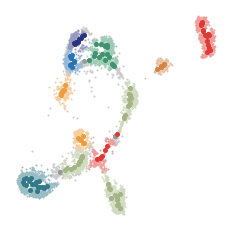

In [12]:
import hdbscan


## Cluster data
clusterer = hdbscan.HDBSCAN(min_cluster_size=4, prediction_data=True)
labels_mean = clusterer.fit_predict(embedding_mean)
labels_all, _ = hdbscan.approximate_predict(clusterer, embedding_all)




## Swap colors for better visualization
i_s, j_s = 3, 9
labels_mean[labels_mean == i_s], labels_mean[labels_mean == j_s] = (j_s, i_s)
labels_all[labels_all == i_s], labels_all[labels_all == j_s] = (j_s, i_s)

all_name_clusters = list()
for label in np.unique(labels_mean):
    
    #if label >= 0:
    all_name_clusters.append(dataset.names[labels_mean == label])
    if label >= 0:
#         color_val = pastel_rainbow_interpolated[label]
        color_val = dg.pastel_rainbow[label % 8]
#         color_val = dg.pastel_rainbow[label]
    else:
        color_val = (0.6, 0.6, 0.6)
    
    plt.plot(
        embedding_all[labels_all == label, 0], 
        embedding_all[labels_all == label, 1],  
        '.', 
        markersize=2, 
        color=dg.lighter(color_val, 0.5)
    )
    plt.plot(
        embedding_mean[labels_mean == label, 0], 
        embedding_mean[labels_mean == label, 1],  
        '.', 
        color=color_val,
        markersize=8
    )

fixed_aspect_ratio(1)
dg.vanish_axes()
# dg.better_savefig(FIGURE_PATH + "clustered_umap")

/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least on

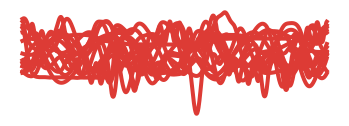

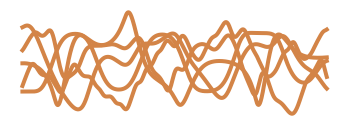

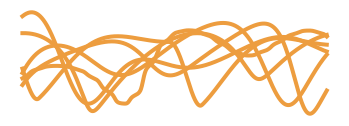

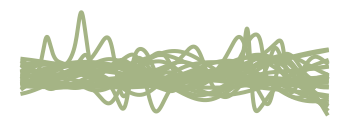

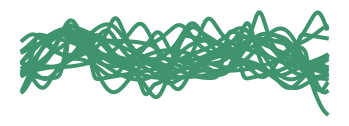

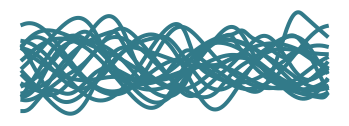

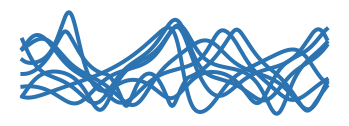

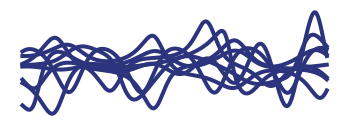

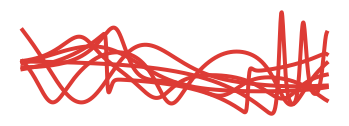

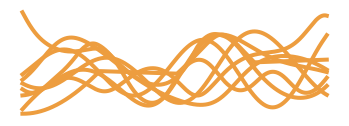

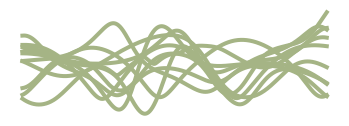

In [154]:
import dysts.flows

for label, cluster in zip(np.unique(labels_mean), all_name_clusters):
    if label < 0:
        continue
    #print(label, cluster)
    color_val = dg.pastel_rainbow[label % 8]
    plt.figure()
    for item in cluster:
        model_dyn = getattr(dysts.flows, item)()
        sol = model_dyn.make_trajectory(1000, resample=True, standardize=True, pts_per_period=500)
        #plt.plot(sol[:, 0], sol[:, 1], color=color_val)
        plt.plot(sol[:, 0], color=color_val, linewidth=4)
    fixed_aspect_ratio(1/3)
    dg.vanish_axes()
    dg.better_savefig(FIGURE_PATH + f"ts{label}.png")
        

In [ ]:
## Next step: Assign feature importance

+ Fit a RandomForest to pseudolabels?


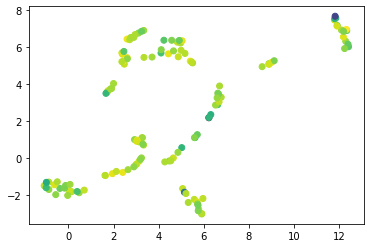

In [22]:
# names = np.array(list(data.keys()))
import dysts.flows
# lyaps = np.array([getattr(dysts.flows, item)().maximum_lyapunov_estimated for item in data])
# kydims = [getattr(dysts.flows, item)().kaplan_yorke_dimension for item in data]
cdims = [getattr(dysts.flows, item)().correlation_dimension for item in data]
# minmag = [np.min(np.abs(getattr(dysts.flows, item)().lyapunov_spectrum_estimated)) for item in data]
# dtvals = np.array([getattr(dysts.flows, item)().dt for item in data])
# periods = np.array([getattr(dysts.flows, item)().period for item in data])

plt.scatter(embedding_mean[:, 0], embedding_mean[:, 1], c=np.log10(cdims))

In [24]:
from scipy.stats import spearmanr

top_features = list()
for i, feats in enumerate(feat_arr.T):
    max_corr = max(
        np.abs(spearmanr(embedding_mean[:, 0] + embedding_mean[:, 1], feats).correlation),
        np.abs(spearmanr(embedding_mean[:, 0] + embedding_mean[:, 1], feats).correlation)
       )
    if max_corr > 0.5:
        top_features.append((i, feat_names[i], max_corr))
sort_inds = np.argsort([item[2] for item in top_features])[::-1].astype(int)
top_features = np.array(top_features)[sort_inds]
print(top_features[:10])

/Users/williamgilpin/miniconda3/envs/dysts/lib/python3.8/site-packages/scipy/stats/stats.py:4264: SpearmanRConstantInputWarning: An input array is constant; the correlation coefficent is not defined.
  warnings.warn(SpearmanRConstantInputWarning())


NameError: name 'feat_names' is not defined

# Plot example dynamics

In [26]:
print(all_name_clusters, "\n")
for i in [0, 3, 5]:
    print(all_name_clusters[i])

[array(['AnishchenkoAstakhov', 'BelousovZhabotinsky', 'HindmarshRose',
       'HyperCai', 'SprottA'], dtype='<U23'), array(['BeerRNN', 'DoublePendulum', 'HastingsPowell', 'JerkCircuit',
       'Lorenz84', 'Lorenz96', 'LuChen', 'PiecewiseCircuit', 'SprottF',
       'SprottH', 'SprottL', 'SprottO', 'Torus', 'TurchinHanski',
       'VossDelay'], dtype='<U23'), array(['MackeyGlass', 'OscillatingFlow', 'Thomas', 'ThomasLabyrinth',
       'YuWang'], dtype='<U23'), array(['ArnoldWeb', 'Colpitts', 'IsothermalChemical', 'SprottK',
       'SprottQ', 'SprottR'], dtype='<U23'), array(['Bouali2', 'ChenLee', 'Chua', 'Coullet', 'Dadras', 'DequanLi',
       'ExcitableCell', 'FluidTrampoline', 'ForcedBrusselator',
       'GuckenheimerHolmes', 'Hadley', 'HyperRossler', 'HyperYan',
       'ItikBanksTumor', 'KawczynskiStrizhak', 'Rucklidge', 'SprottB',
       'SprottD', 'SprottDelay', 'SprottE', 'SprottTorus',
       'StickSlipOscillator', 'WangSun', 'YuWang2'], dtype='<U23'), array(['Aizawa', 'CaTwoPlus'

/Users/williamgilpin/program_repos/dysts/dysts/flows.py:371: RuntimeWarning: invalid value encountered in sqrt
  rf = (self.ci - self.z0*z)*np.sqrt(x)
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.")
/Users/williamgilpin/program_repos/dysts/dysts/base.py:166: UserWarning: This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in order to generate trajectories from the raw system.
  warnings.warn("This system has at least one unbounded variable, which has been mapped to a bounded domain. Pass argument postprocess=False in ord

IndexError: index 13 is out of bounds for axis 0 with size 13

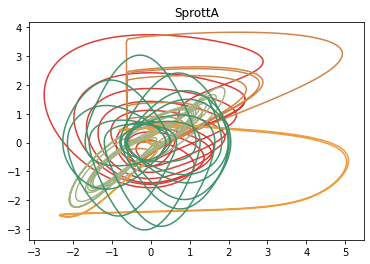

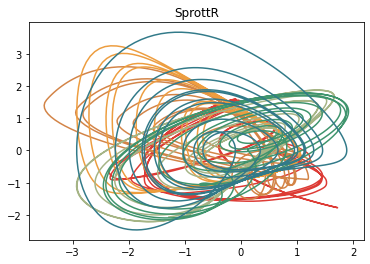

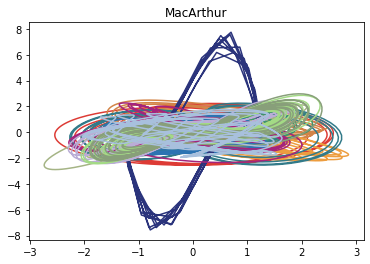

In [31]:
for cluster in [all_name_clusters[i] for i in [0, 3, 5]]:
    
    colors = ["r", "b", "k"]
    plt.figure()
    for j, equation_name in enumerate(cluster):
        eq = getattr(dysts.flows, equation_name)()
        sol = standardize_ts(eq.make_trajectory(2000, resample=True, pts_per_period=200))
#         plt.figure()
#         plt.plot(sol[:, 0],  'k')

        
        plt.plot(sol[:, 0], sol[:, 1],  color=dg.pastel_rainbow[j])
        plt.title(equation_name)
        

In [71]:
all_name_clusters[8]

array(['HyperYangChen', 'Laser', 'Lorenz', 'PanXuZhou', 'PehlivanWei',
       'QiChen', 'SprottC', 'Tsucs2'], dtype='<U23')

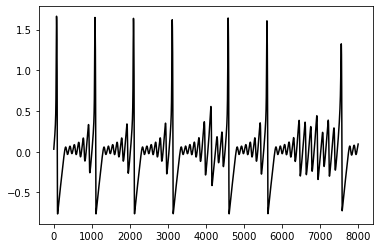

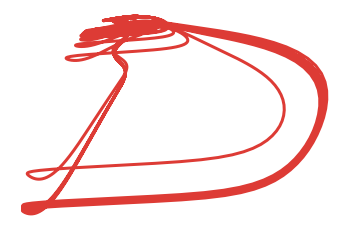

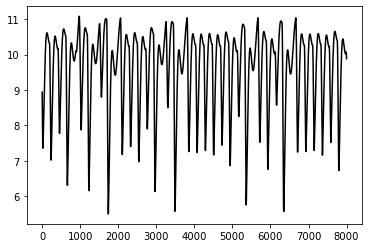

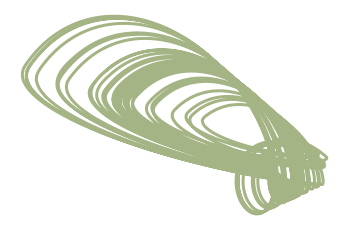

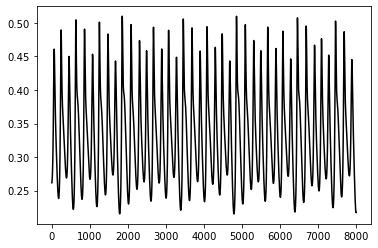

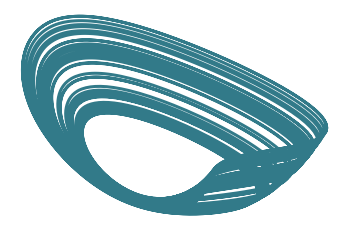

In [79]:
from dysts.flows import *


# eq = Lorenz84()
# eq = SprottA() # relaxation oscillator dynamics / spiking
# eq = ForcedFitzHughNagumo() #  nearly-quasiperiodic
# eq = Lorenz()
# eq = ArnoldBeltramiChildress() # ABC Turbulence


for clr_ind, equation_name in zip([0, 3, 5], ["HindmarshRose", "Colpitts", "CaTwoPlus"]):
    eq = getattr(dysts.flows, equation_name)()
    # eq = HindmarshRose(); clr = dg.pastel_rainbow[0 % 8] # HindmarshRose neuron
    # eq = Colpitts(); clr = dg.pastel_rainbow[3 % 8] #Colpitts LC Circuit
#     eq = CaTwoPlus(); clr = dg.pastel_rainbow[5 % 8] # Quasiperiodic family
    clr = dg.pastel_rainbow[clr_ind % 8]
    sol = eq.make_trajectory(8000, resample=True, pts_per_period=200)

    plt.figure()
    plt.plot(sol[:, 0],  'k')

    plt.figure()
    plt.plot(sol[:, 0], sol[:, 1],  color=clr, linewidth=3)
    vanish_axes()
    dg.better_savefig(FIGURE_PATH + f"sample_{equation_name}.png")

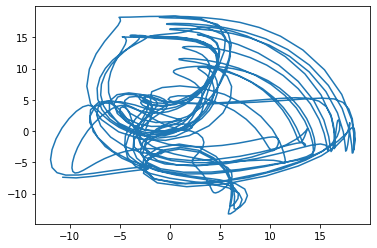